In [16]:
import xgboost as xgb
import numpy as np
import sys

import xgboost_explainer as xgb_exp

def sigmoid(x):
    return 1/(1+np.exp(-x))

# param <- list(objective = "binary:logistic", base_score = 0.5)
# xgboost.cv = xgb.cv(param=param, data = xgb.train.data, folds = cv, nrounds = 1500, early_stopping_rounds = 100, metrics='auc')
# best_iteration = xgboost.cv$best_iteration
# xgb.model <- xgboost(param =param,  data = xgb.train.data, nrounds=best_iteration)

dtrain = xgb.DMatrix('./train.libsvm')
dtest = xgb.DMatrix('./test.libsvm')

lmda = 1.0

params = {"objective":"binary:logistic", 'silent': 1, 'eval_metric': 'auc', 'base_score':0.5, "lambda":lmda}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
# cvr = xgb.cv(params, dtrain, nfold=10, num_boost_round=1500, metrics={'auc'},
#         callbacks=[xgb.callback.print_evaluation(show_stdv=False), xgb.callback.early_stop(100)])
# # print(cvr)
best_iteration = 42
bst = xgb.train(params, dtrain, best_iteration, watchlist)

# model_path = sys.argv[1]
# test_path = sys.argv[2]
# bst=xgb.Booster(model_file=model_path)
tree_lst = xgb_exp.model2table(bst, lmda=lmda)
# 
# test_data = xgb.DMatrix(test_path)
# sample = dtest.slice([802])
# print(bst.predict(sample))
leaf_lsts = bst.predict(dtest, pred_leaf=True)
ylist = []
zlist = []
for i,leaf_lst in enumerate(leaf_lsts):
    dist = xgb_exp.logit_contribution(tree_lst, leaf_lst)
    sum_logit = 0.0
    ylist.append(dist['f0'])
    zlist.append(dist['f1'])
    for k in dist:
        sum_logit += dist[k]
        print(k, dist[k])
    # print(sigmoid(sum_logit))

[0]	eval-auc:0.881815	train-auc:0.88921
[1]	eval-auc:0.884958	train-auc:0.901352
[2]	eval-auc:0.892625	train-auc:0.910276
[3]	eval-auc:0.893305	train-auc:0.912782
[4]	eval-auc:0.892315	train-auc:0.917184
[5]	eval-auc:0.897985	train-auc:0.922855
[6]	eval-auc:0.899285	train-auc:0.924782
[7]	eval-auc:0.903737	train-auc:0.930263
[8]	eval-auc:0.904142	train-auc:0.931732
[9]	eval-auc:0.905816	train-auc:0.933975
[10]	eval-auc:0.907531	train-auc:0.935354
[11]	eval-auc:0.908491	train-auc:0.937102
[12]	eval-auc:0.909793	train-auc:0.938453
[13]	eval-auc:0.909904	train-auc:0.939186
[14]	eval-auc:0.911581	train-auc:0.940076
[15]	eval-auc:0.912343	train-auc:0.941709
[16]	eval-auc:0.912846	train-auc:0.94346
[17]	eval-auc:0.913705	train-auc:0.943873
[18]	eval-auc:0.914476	train-auc:0.944375
[19]	eval-auc:0.914457	train-auc:0.944905
[20]	eval-auc:0.914666	train-auc:0.945576
[21]	eval-auc:0.914943	train-auc:0.945783
[22]	eval-auc:0.915743	train-auc:0.946788
[23]	eval-auc:0.915504	train-auc:0.947871
[24]

f0 0.20342073597862714
f5 0.1256314583219358
f7 -0.08075269840377114
f8 -0.07555578472215138
f6 0.013706567510505488
intercept -1.4175717811110307
f0 0.7746479412367874
f2 -0.5580479691314145
f1 -0.10234276526527718
f3 0.41801700241014295
f4 -1.403769960799012
f8 -0.05792306912812338
f7 -0.44050712918830326
f5 0.0985466228399515
f6 0.010294137136278986
intercept -1.4175717811110307
f1 0.5379953660922452
f8 -0.1635630479327009
f3 -0.8664475546552496
f0 0.14816282956526006
f4 -1.8009496963589509
f5 0.1256314583219358
f7 -0.08503817836740034
f2 0.09173918993538546
f6 0.013706567510505488
intercept -1.4175717811110307
f2 -0.022101618417386403
f1 0.3206173719660178
f3 -0.19164653965416234
f0 1.336202463418617
f4 0.10534832058780297
f8 -0.06732009003010106
f5 0.12531318749560813
f6 0.016684745757004234
f7 -0.06781724501236995
intercept -1.4175717811110307
f0 -1.0728877020138363
f1 -0.794184713765536
f4 -0.04853802839357779
f2 0.1328078985352258
f5 -1.0786377423931088
f3 0.0006036263447469388

f1 -0.363413246064485
f0 -1.0368167090523956
f4 -0.9567652253849381
f2 -0.3255355427718011
f5 -0.9595334546303631
f3 0.2550421786646698
f8 -0.04885626744865165
f7 -0.019472080016413526
f6 -0.6936050171845918
intercept -1.4175717811110307
f1 -0.47432483473358744
f3 -1.085840509773321
f4 -0.37149338981256447
f0 0.032051806632456985
f5 0.13571952511967916
f8 0.2690797744094355
f2 0.6747925566075849
f7 -0.16906163413614678
f6 0.00413608579749353
intercept -1.4175717811110307
f0 1.3782305873964622
f4 0.17817978767450665
f3 -0.028053037592571745
f1 0.40379633153825656
f2 0.21472174237681999
f8 -0.06732009003010106
f5 0.12531318749560813
f6 0.016684745757004234
f7 0.2650780914950454
intercept -1.4175717811110307
f3 -0.6934010634407324
f1 -0.4255147294999799
f4 0.5099056052916344
f0 0.12755310710478213
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 -0.06199184107816779
f6 0.020701260038655245
intercept -1.4175717811110307
f3 -0.33004311765746336
f1 0.4818244689384252

f3 -0.44857637290302693
f7 0.12108812802825494
f8 0.1588337887756609
f6 0.01154171488495433
intercept -1.4175717811110307
f3 -0.6984709286763017
f1 -0.5928758093920784
f4 0.2379196641106996
f0 0.19294146050857097
f2 -0.13493066779749513
f5 -1.148520230775787
f8 0.1779955105537869
f7 -0.06066207412045689
f6 0.008965925700092126
intercept -1.4175717811110307
f0 -0.2306978943404433
f1 -0.07294008469735505
f4 -0.11616607823877265
f3 0.6706315826703602
f5 0.14434778319581726
f8 0.24637130059473267
f2 -0.8376672969337032
f6 0.010526694418218779
f7 -0.051954850557824034
intercept -1.4175717811110307
f1 0.07663159945921787
f3 -0.1836045093544198
f4 0.12093204293225832
f0 0.21836908522370824
f5 0.14918915217882334
f8 0.30981406432855396
f2 -0.13318226709585027
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f0 -0.4341183036116352
f1 0.40926020360323795
f4 -0.07675778245472667
f2 0.4602691461861929
f5 -1.0786377423931088
f8 0.1913058385781357
f7 0.0826679766249495
f3

f2 0.5720135790410537
f7 -0.024389720002057594
f6 0.0053836635461688735
intercept -1.4175717811110307
f4 1.297235201964902
f3 0.6233703825102285
f1 1.327769215981184
f0 -0.6869546316537878
f5 0.17213867492221735
f8 0.2833103013979055
f2 0.15933550144221545
f6 0.024713189807296546
f7 0.11463043973886919
intercept -1.4175717811110307
f0 -1.072615295357487
f4 0.21068151597790796
f3 -0.13100107556296747
f1 0.6073440326410445
f2 0.1958393972057936
f8 0.2847159178500396
f5 0.1154145977428036
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f1 0.19054120939896238
f0 -1.272122031209933
f4 -1.6770703444287818
f3 0.4296471062091818
f5 0.13185788363005843
f8 0.22989498652394114
f2 0.07564123007701208
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f0 -1.1356749912605264
f1 -1.6792226954620004
f4 0.07095607046182911
f3 0.19075041043809252
f5 0.13185788363005843
f8 0.22989498652394114
f7 -0.06709399155771036
f2 0.03181301463747683
f6 0.0145

f2 0.025788589221032714
f6 0.013706567510505488
intercept -1.4175717811110307
f1 -0.9899918681472125
f8 -0.055580750096051
f3 -0.21556546258610662
f0 -0.19127160085147188
f2 -0.3569770112548466
f5 -1.3777216312100282
f4 -0.0143781962154736
f7 0.061610149059116534
f6 0.018536407413104083
intercept -1.4175717811110307
f3 -0.3808596146807417
f1 -0.28122695106307866
f0 1.531393796741532
f4 0.27410041039307953
f8 0.2847159178500396
f5 0.1154145977428036
f2 0.010424103513500444
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f3 -0.627408392168193
f0 0.14098818936109703
f4 -1.8487010303182807
f1 0.32971115103259835
f5 0.1256314583219358
f8 -0.11482639493550813
f7 -0.12675302788187157
f2 -0.20104180481125314
f6 0.013706567510505488
intercept -1.4175717811110307
f1 -1.3957016745844728
f8 -0.2876113663884521
f3 0.09563046922648237
f0 0.15265950424724956
f5 0.14296272687070072
f4 0.3988613465582971
f7 0.2061423086255438
f2 -0.07129729848297314
f6 0.02070126003865524

f8 0.30981406432855396
f2 0.008025001949649757
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f4 -0.07166141262948986
f2 1.2601446727103904
f1 0.8569650736538356
f3 1.041722595795783
f0 0.3802724088173232
f5 0.1256314583219358
f8 0.20752511629138196
f7 -0.2179919498941221
f6 0.0071142640439922755
intercept -1.4175717811110307
f3 -1.4250444255264174
f1 0.02819841642533951
f4 0.5989561400067296
f0 -1.6091337427623673
f5 0.11486022602257276
f2 -0.010290285557748871
f7 0.45438374664380177
f8 -1.0136012678407496
f6 0.014543208699869789
intercept -1.4175717811110307
f3 -0.8526059136979074
f1 -0.8602053899766193
f4 0.23482941646257668
f0 -0.00033679495718935356
f5 0.14296272687070072
f2 -0.11666255372501506
f7 -0.10456113924903312
f8 -0.15109537128091105
f6 0.01728882966442874
intercept -1.4175717811110307
f3 -0.35557020140923107
f0 -0.2975885520845268
f4 -0.3818442526151772
f1 -0.29027816428818676
f5 0.13185788363005843
f8 0.24637130059473267
f2 0.0023335192918

f5 0.16591224961409473
f8 -0.0943677537391104
f7 0.2916016371735708
f2 0.15933550144221545
f6 0.030871241146082
intercept -1.4175717811110307
f4 0.36586405993396626
f2 0.2740627518342637
f1 0.2584206791617974
f3 0.568417030084589
f0 0.0980458401502979
f5 0.14918915217882334
f8 0.30981406432855396
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.9102300913533893
f3 -0.058114132491040166
f4 0.03755191807072106
f0 -0.03962292064717336
f5 0.15545262643645952
f2 -0.8147757309376893
f7 -0.1575712785981098
f8 -0.19042360487925353
f6 0.013706567510505488
intercept -1.4175717811110307
f1 -0.4875839505541871
f3 -0.370598533692959
f4 -0.6974314734461872
f0 -0.1953863485970851
f5 0.13185788363005843
f8 0.24637130059473267
f7 0.05055051053843834
f2 0.24786797146649905
f6 0.007548516171720033
intercept -1.4175717811110307
f4 1.253119818330863
f3 0.5527642402366109
f1 1.2928041912590267
f0 -0.7152640797217723
f5 0.17213867492221735
f8 0.2833103013979055
f2 0.06515943

f2 0.17215901472118852
f8 0.29621342161324954
f5 0.13153961280373075
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f0 -1.2448973056031947
f1 -1.1237132235847105
f4 -0.05258810401888153
f3 -0.1780713431182906
f5 0.13812135788769464
f7 0.22534422659256967
f8 -0.14778306861307472
f2 -0.14261735918808616
f6 0.016684745757004234
intercept -1.4175717811110307
f0 -1.74977256885979
f1 -0.9257600837582303
f4 -0.09140373602889634
f2 -0.5151500147877426
f5 -1.0786377423931088
f3 -0.274264039182683
f8 0.17482952450734418
f7 0.2597122300679681
f6 0.0053836635461688735
intercept -1.4175717811110307
f2 -0.09284782973684513
f1 0.1079233536200405
f3 0.6322604445029173
f0 0.33302920524153806
f4 -0.16461406207387083
f5 0.14296272687070072
f8 0.27096788002520317
f7 -0.16906163413614678
f6 0.00413608579749353
intercept -1.4175717811110307
f0 -0.9054571447182943
f1 -1.7939603533555355
f4 0.04793716374977612
f3 0.5686575399142546
f5 0.1605798777253415
f7 -0.03168904447378809


f3 -0.2581952466661885
f5 0.1256314583219358
f7 -0.08503817836740034
f8 0.11525627201721923
f2 -0.24473395393778952
f6 0.013706567510505488
intercept -1.4175717811110307
f4 0.10443625549228536
f8 0.2846832895090587
f2 -0.40802558946632744
f1 0.4160703439201582
f3 1.1111274078267706
f0 1.6412957498313496
f5 0.08864803308714694
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f7 0.4360879254920674
f1 -1.5637318839787524
f4 0.7456701446595619
f0 -0.7528184748492919
f5 0.1273501255883316
f3 -0.3593146441295098
f2 -0.8366243875304972
f8 -1.0136012678407496
f6 0.014543208699869789
intercept -1.4175717811110307
f5 -1.3473768233115306
f8 0.25706302186597324
f1 -0.960546665166952
f3 0.25959850210136765
f0 -0.3434095668526162
f2 -0.31583318119295695
f4 -0.24719923314718403
f7 0.11068242826876017
f6 0.0053836635461688735
intercept -1.4175717811110307
f4 -0.08218000990984829
f2 -0.07030311119455754
f1 -0.09972116122083584
f3 0.809522531673996
f0 -0.1859845780672097
f5 -

f4 -0.07955484304404489
f3 -0.1209393250174259
f5 0.14434778319581726
f8 0.22989498652394114
f7 -0.06709399155771036
f2 -0.8989975008125212
f6 0.014543208699869789
intercept -1.4175717811110307
f1 -0.4525828615502522
f3 -0.6221167227026243
f4 -0.12879459820682257
f0 -0.23807462143957847
f5 0.11486022602257276
f7 0.005844046941942946
f2 -0.05664793068119108
f8 -1.3860548309728868
f6 0.014543208699869789
intercept -1.4175717811110307
f0 0.93110028384904
f4 0.20743181253984594
f3 0.23171941045123365
f1 0.3845122664448293
f5 0.12359546632999044
f8 -0.1050116246796308
f2 0.02856893316546369
f6 0.016684745757004234
f7 0.11753695225325447
intercept -1.4175717811110307
f3 0.6745588472994501
f1 0.8005306821647565
f4 0.39149686807851275
f0 -0.8782848395730168
f5 0.17213867492221735
f8 0.25268489014384504
f2 -0.09406498647090064
f6 0.024713189807296546
f7 0.11463043973886919
intercept -1.4175717811110307
f4 0.22829797619963396
f2 0.8282393473085223
f1 0.21216793532080405
f3 0.6314498123534829
f0 

f2 -0.031073776657158443
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -0.14182182798729903
f1 -0.1908105853307947
f4 1.205642301807712
f0 0.7744811018236701
f5 0.1757315430955211
f8 0.4029625312111548
f2 0.03418316647798037
f6 0.007548516171720033
f7 -0.024203741158634107
intercept -1.4175717811110307
f1 -0.6847163137647536
f3 -1.349937585249157
f4 -0.30011667396456015
f0 0.23722465438297624
f5 0.11214979748071488
f2 -0.1739751454272459
f7 -0.015108661159556877
f8 -1.222372263289625
f6 -1.0152488428977622
intercept -1.4175717811110307
f0 -0.11898332387984163
f1 -0.09059589617575822
f4 0.22257915490574265
f3 -0.12123412429679943
f5 0.13185788363005843
f2 0.14887791521144728
f8 0.22989498652394114
f6 0.011565030453371043
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.21582978530495142
f3 -0.1489607568137376
f4 -2.8214636846397676
f0 -0.35347574457866837
f5 0.13185788363005843
f8 -0.02834395877497335
f2 0.019248409601530916
f6 0.007548516171720033
f7 -0.05436244318

f3 -1.6768143485331035
f1 0.9501611916025008
f4 0.032079577662042696
f0 -1.0844471392049326
f5 0.1256314583219358
f7 -0.08503817836740034
f8 -0.14778306861307472
f6 0.020701260038655245
f2 -0.2634874087955929
intercept -1.4175717811110307
f3 -2.5302714158957724
f1 0.6138079411662343
f4 -3.020708163695801
f0 -0.7541070869834591
f5 0.11838825657091426
f7 0.4487889166537206
f8 -0.10642335340701879
f2 -0.2171566274340674
f6 0.010294137136278986
intercept -1.4175717811110307
f1 0.5258168200737251
f3 0.17467274363510515
f4 -0.02945302311714398
f0 -0.009451736249447215
f5 0.14296272687070072
f2 -0.03397686840132599
f7 0.24785715814001505
f8 -0.19042360487925353
f6 0.020701260038655245
intercept -1.4175717811110307
f4 0.07151697867885566
f2 0.35959605183426363
f1 0.7131802450048778
f3 0.8303398371993042
f0 0.15289450994188675
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f6 0.016684745757004234
intercept -1.4175717811110307
f1 -0.469956591906385
f3 -0.5479849462164968


intercept -1.4175717811110307
f1 0.09691738740631399
f0 0.18085228306279222
f4 -1.5494403338173088
f2 -0.0809069805281444
f5 -0.9548909605042114
f3 0.06737180291368068
f7 0.10357057924476784
f8 -1.550241975213028
f6 0.0053836635461688735
intercept -1.4175717811110307
f3 -0.07869967049644079
f1 -0.8369756139934693
f4 -3.195914194393287
f0 0.3090382249509707
f5 0.14820942468543796
f8 -0.13258757560240603
f7 -0.43838774974584466
f2 0.34794972156979
f6 0.010294137136278986
intercept -1.4175717811110307
f5 0.18526180859259334
f8 0.33778123474382243
f1 -2.0170972086348575
f3 -3.4851577795219066
f0 0.16594213047218714
f4 0.13951717316055617
f2 0.14595246448257473
f7 -0.027833386602157038
f6 0.010526694418218779
intercept -1.4175717811110307
f2 0.572368417556501
f1 -0.20096889436480922
f3 -1.033759036800461
f0 1.699717835421693
f4 0.10418961975404284
f8 -0.36355618483945285
f5 0.11443487024941823
f6 0.013706567510505488
f7 -0.14065155837640633
intercept -1.4175717811110307
f1 0.631171735579888

f2 0.07135860357818184
f8 -1.3860548309728868
f6 0.007548516171720033
intercept -1.4175717811110307
f3 -0.5731082595223873
f1 -0.7169535063521545
f4 0.12067180709440206
f0 0.24515148092882025
f5 0.14647872363696546
f8 0.30981406432855396
f2 -0.20168752248876654
f6 -1.3660636286161107
f7 -0.23620113289829206
intercept -1.4175717811110307
f0 0.7950981113331906
f1 0.5969907491023452
f4 1.2357443032869093
f3 -0.06877217054098522
f5 0.1757315430955211
f8 0.48244182600454133
f2 -0.08631161484970987
f6 0.007548516171720033
f7 0.08022821250749801
intercept -1.4175717811110307
f1 -0.09506516635440419
f0 -1.2732544193448965
f4 -1.715725008104096
f2 -0.012741808550820598
f5 -0.9957659677012313
f3 -0.4423799636640889
f8 -0.12723441540250258
f7 0.11836535206112803
f6 0.00197123317194237
intercept -1.4175717811110307
f3 0.7128145173785303
f1 0.350511941875052
f4 0.435481162545387
f0 -0.676865313699909
f5 0.16591224961409473
f7 -0.08503817836740034
f8 -0.14778306861307472
f2 0.18506604423226858
f6 0.

f8 -0.14778306861307472
f2 -0.1810597270946918
f6 0.013706567510505488
intercept -1.4175717811110307
f4 0.09739887553103144
f2 0.6092948835864043
f1 1.2162801581808667
f3 0.6165952807364418
f0 0.24312115493074826
f5 0.13185788363005843
f8 0.22989498652394114
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f0 -0.8818779533753883
f1 0.7209867091937254
f4 0.5049334188935999
f3 -0.21763440569180661
f5 0.14296272687070072
f8 -0.14332187955440157
f7 0.10049993609405362
f2 -0.0600146663581081
f6 0.020701260038655245
intercept -1.4175717811110307
f4 0.12977944378663686
f8 0.3126571073430602
f2 -0.053679470029628626
f1 0.39633511721931186
f3 0.4889443535685444
f0 0.8862278019179443
f5 0.10477304814807412
f6 0.010526694418218779
f7 0.11463043973886919
intercept -1.4175717811110307
f0 -2.3079928541093095
f1 -1.238971037729053
f4 -0.12489166113522195
f2 -0.0005608313883248145
f5 -0.9548909605042114
f3 -0.1782170495124325
f7 -0.2916270560900559
f8 -1.550241975213028
f6

f1 -0.2835145493926557
f3 -0.30734983234570745
f4 -0.42658073664556695
f0 -0.1951586792676456
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 -0.083468401442738
f6 0.013706567510505488
intercept -1.4175717811110307
f4 0.28443036884690864
f8 0.2559345192294539
f2 -0.08263402404207021
f1 0.6682049001168835
f3 0.805661366990447
f0 -0.34642033451171633
f5 -1.264482681651476
f7 0.17081038758643122
f6 0.0053836635461688735
intercept -1.4175717811110307
f4 1.0699810392840465
f3 0.892427348682416
f1 0.2216524972745196
f0 -0.9766801186705079
f5 0.15866904786307318
f7 0.14510122796657143
f8 -0.1496711742288424
f2 0.4043950367936722
f6 0.030871241146082
intercept -1.4175717811110307
f1 -0.7694244304320045
f8 -0.22268394380565476
f3 0.08099667686401398
f0 0.0661300764040446
f5 0.14296272687070072
f4 -0.18881019310366742
f7 -0.08503817836740034
f2 0.024662754170492643
f6 0.013706567510505488
intercept -1.4175717811110307
f0 -1.0650105028394306
f1 -0.5599942476703281
f4 -0.

f0 -0.2682191331120184
f5 0.14296272687070072
f8 0.27096788002520317
f2 -0.11838770937204712
f7 -0.23230517072132958
f6 0.0071142640439922755
intercept -1.4175717811110307
f1 0.3097912877811779
f3 -0.5107005444735659
f4 0.07947360658352459
f0 -0.2652079989609909
f5 0.13185788363005843
f8 0.24637130059473267
f2 -0.09801899748264553
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.5802649907786045
f3 -0.880883638505846
f4 -0.3735272539747634
f0 -0.09567233415039746
f5 0.14194595042780178
f2 0.42301388545930624
f8 0.29144964464199474
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f4 0.38451536068628667
f8 0.29429268765650096
f2 0.6125487773690614
f1 0.8516409698140567
f3 0.6119242365446844
f0 1.1270354619760035
f5 0.09752984639705256
f6 0.010526694418218779
f7 -0.06277267875083421
intercept -1.4175717811110307
f0 1.6345956497406706
f4 0.10203441225493735
f3 0.10198044891596199
f1 0.9937170491425829
f2 0.31240894941416103
f8 

f5 0.1256314583219358
f8 0.19104880222059042
f7 -0.3143279174409284
f2 0.02531508757044972
f6 0.011130778325643284
intercept -1.4175717811110307
f1 -0.41945316732739074
f3 -0.4987886884637999
f4 -0.40299068555585266
f0 0.08233606747483437
f5 0.14918915217882334
f8 0.30981406432855396
f2 -0.05743580951567629
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f4 0.22274015188421706
f2 0.1885010263529642
f1 0.3121539895118135
f3 0.3947028027568437
f0 0.29786896851979167
f5 0.14296272687070072
f8 0.27096788002520317
f7 -0.16906163413614678
f6 0.011130778325643284
intercept -1.4175717811110307
f3 0.4342052492263891
f1 0.10800983560307328
f4 0.12529600864552895
f0 -0.7894067587743026
f5 0.15514101731473168
f2 0.11552380710299659
f7 -0.1867878449739338
f8 -1.0136012678407496
f6 0.024713189807296546
intercept -1.4175717811110307
f3 -1.4425686769636128
f1 0.2867789412537981
f4 -0.014468788369257773
f0 -0.7269689148427869
f5 0.1256314583219358
f7 -0.08503817836740034
f

f4 0.027126209608148433
f0 0.040294103125974125
f5 0.14296272687070072
f2 0.13640265229637039
f7 -0.08503817836740034
f8 -0.19042360487925353
f6 0.013706567510505488
intercept -1.4175717811110307
f0 -0.12366172859746338
f1 -0.03293375772600394
f4 0.12811058911225306
f3 -3.3885481820643624
f5 0.1256314583219358
f8 0.17724056658396284
f2 0.3511896681501758
f6 0.010526694418218779
f7 0.013881462912314207
intercept -1.4175717811110307
f0 -0.5686472124356067
f1 -0.3617310454069366
f4 0.39635371342800507
f3 -0.4480554609225272
f5 0.1256314583219358
f7 -0.08503817836740034
f8 -0.14778306861307472
f6 0.020701260038655245
f2 -0.04523778993201995
intercept -1.4175717811110307
f0 -0.9228958185338387
f1 -1.939074547586748
f4 0.09776982423502362
f3 0.035005918906102926
f5 0.13185788363005843
f8 0.22989498652394114
f7 -0.06709399155771036
f2 -0.08371918820566805
f6 0.014543208699869789
intercept -1.4175717811110307
f4 1.291331960316497
f3 0.9019700042882145
f1 1.3379369639842464
f0 0.387615786773157

f7 -0.06781724501236995
intercept -1.4175717811110307
f1 0.1322008388684827
f3 -1.8880870627726194
f4 -0.02112569254994882
f0 0.11804198614123189
f5 0.14918915217882334
f2 0.04183151554855918
f8 0.29333775025776243
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f0 -0.8906756811026371
f1 -1.6583178180369236
f4 0.08353340018723374
f3 -0.2647692957537385
f5 0.13185788363005843
f8 0.22989498652394114
f7 -0.21230294158460652
f2 -0.08371918820566805
f6 0.011565030453371043
intercept -1.4175717811110307
f1 0.6782277137149347
f0 -0.4873270350839058
f4 -1.5016818175850677
f2 -0.335772226145085
f5 -1.0786377423931088
f3 -0.5203696198140221
f8 0.17482952450734418
f6 0.0053836635461688735
f7 0.09988805536377195
intercept -1.4175717811110307
f0 -0.7650180051015001
f1 -0.24750121520310361
f4 0.14535317522831384
f3 -0.5848638238088095
f5 0.1256314583219358
f7 0.24785715814001505
f8 -0.14778306861307472
f6 0.020701260038655245
f2 -0.011158262891401254
intercept -1.4175717

f2 0.10499666940887427
f8 0.2847159178500396
f5 0.1154145977428036
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f2 1.4225945892565222
f0 0.9044155805160491
f3 0.48861064825036227
f1 0.29149365444619824
f4 0.3465396665814685
f8 -0.06920819564586873
f5 0.11806998574458658
f6 0.016684745757004234
f7 0.2015077112047084
intercept -1.4175717811110307
f0 -1.9591513320207257
f1 -0.6614215719087236
f4 0.011593516199739015
f3 -0.2571722809526687
f5 0.13185788363005843
f8 0.22989498652394114
f7 0.0323498657727192
f2 0.10317851841331907
f6 0.011565030453371043
intercept -1.4175717811110307
f4 0.2845879099044886
f8 0.2651602039604847
f2 0.7333249855552965
f1 0.22363181317055617
f3 1.243520033106373
f0 1.7568349414160958
f5 0.08864803308714694
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f4 0.11198787003658274
f2 0.3943665669036356
f1 -0.6350794488349741
f3 0.4337901693330843
f0 0.04232646808652791
f5 0.14296272687070072
f7 -0.153294225

f7 0.016373947945535233
f8 -0.023320411169649766
f6 0.01154171488495433
intercept -1.4175717811110307
f7 0.21222590810142344
f1 -1.9763863027762636
f4 1.1312483692226882
f0 -1.121929251050488
f5 0.13185788363005843
f3 -0.3694471208484128
f8 0.22989498652394114
f2 0.10144987285471278
f6 0.011565030453371043
intercept -1.4175717811110307
f0 -0.46425415061775827
f1 -0.16866177635350094
f4 -0.0395029076729837
f3 -0.25033780255118526
f5 0.13185788363005843
f8 0.24637130059473267
f2 0.04842000064292851
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f0 0.07382871739670695
f2 -0.718025689126694
f1 0.32999643627748204
f3 0.6743082402862849
f4 0.15785397175699123
f8 0.3284100864877016
f5 0.11519042400384472
f6 0.007548516171720033
f7 -0.11519838714300684
intercept -1.4175717811110307
f1 0.2647011030432161
f3 -0.29644830831776026
f4 -0.0681999101475454
f0 -0.5011423655250362
f5 0.14296272687070072
f8 0.27096788002520317
f2 0.028466889972755968
f7 -0.16906163413614678

f8 0.19966806020150774
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f0 1.0465362112869752
f4 0.10689537024993194
f3 0.08673041562367882
f1 -0.14584005153470206
f2 0.3611322308043355
f8 0.012323159246202989
f5 -1.098385291978993
f7 0.19684098752864637
f6 0.01154171488495433
intercept -1.4175717811110307
f3 -0.3295213458682652
f1 -1.174379897222484
f0 0.8490910591181415
f5 0.11584002301854832
f7 -0.2357107664359586
f2 -0.15548695781444777
f8 -1.4952121905393576
f4 0.06950919743663425
f6 0.010526694418218779
intercept -1.4175717811110307
f2 -1.3118405327817793
f1 0.2604281350394873
f3 1.1886843052723357
f0 -0.08520519534276581
f4 -0.09239603995309344
f5 0.14434778319581726
f8 0.22989498652394114
f6 0.010526694418218779
f7 0.11463043973886919
intercept -1.4175717811110307
f4 -1.2352376893202783
f8 -0.07885022213429187
f2 0.033759501995961456
f1 0.1813202062920937
f3 0.9812367248449855
f0 1.993588517449701
f7 0.2668188316933296
f5 0.08242160777902433
f6 0.01

f2 -0.14046638653365873
f8 0.29333775025776243
f6 0.007548516171720033
f7 0.20368298971197304
intercept -1.4175717811110307
f5 -1.1814331182669697
f8 0.20730101038055238
f1 -0.8732925797757696
f3 -0.5837431835496764
f0 0.2558688098554303
f2 -0.3578688521304272
f4 -2.985133524154849
f7 0.15471359858079733
f6 0.00197123317194237
intercept -1.4175717811110307
f1 -0.7650914402736816
f3 -0.551951550843275
f4 -0.16262976694336118
f0 -0.04470987047297413
f5 0.11486022602257276
f7 0.005844046941942946
f2 -0.12002043604717705
f8 -1.3860548309728868
f6 0.014543208699869789
intercept -1.4175717811110307
f0 0.03657592457623045
f1 -0.12509573708036664
f4 0.2890953595062256
f3 0.7692611476572727
f5 0.13185788363005843
f8 0.22989498652394114
f2 0.045463242048196406
f6 0.024713189807296546
f7 -0.051954850557824034
intercept -1.4175717811110307
f3 0.5935359059911345
f1 0.6724244546307474
f4 0.4079225944115373
f0 -0.8963771617155556
f5 0.16591224961409473
f8 -0.0943677537391104
f7 0.008603664329885229
f

f0 -1.890740427680309
f5 0.14434778319581726
f8 0.20197213649684387
f2 -0.09678521862424666
f6 0.014543208699869789
f7 -0.09895057176699681
intercept -1.4175717811110307
f3 -0.6779500017051124
f1 -0.682157401982957
f0 1.3252263280419085
f4 -0.11318758766598758
f8 -0.027991856431758597
f5 0.12531318749560813
f2 -0.1262502088829473
f6 0.010294137136278986
f7 -0.08734020589400274
intercept -1.4175717811110307
f3 -0.5072849850070156
f1 -1.3602493142752081
f0 0.9683241118610559
f4 0.06045223360601426
f8 0.2896847678380226
f2 -0.1819734307025296
f5 0.10477304814807412
f7 0.07291559022439796
f6 0.010526694418218779
intercept -1.4175717811110307
f1 1.9566134250918212
f0 -1.766978176514884
f4 -2.4949657824557834
f5 0.13185788363005843
f3 -0.6227760819536997
f8 0.1831917461307162
f2 1.0014593562722125
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f1 0.30036469248135284
f0 -0.8619089770984717
f4 -0.9589020498595331
f2 0.019474701675087275
f5 -1.0786377423931088
f3 -

f8 -0.14778306861307472
f6 0.030871241146082
f2 -0.033563549018209286
intercept -1.4175717811110307
f2 1.2633009370618389
f1 0.019883604594487233
f3 -0.5010657761773578
f0 1.4947927472000544
f4 0.16935261916196945
f8 0.01464867983442018
f5 0.1079819189468432
f6 0.01327231538277773
f7 -0.2894447198940028
intercept -1.4175717811110307
f0 1.4685201844971265
f4 0.17716217066414133
f3 -0.13461166354449436
f1 1.1527646198676995
f7 -0.1784590344603263
f8 -2.004852983717609
f5 0.11755774418416601
f2 -0.05950266755139495
f6 0.007548516171720033
intercept -1.4175717811110307
f1 -0.8748729376189854
f0 -1.2597902954282267
f4 -1.8371600149261955
f3 0.2653626850465999
f5 0.13185788363005843
f8 -0.04482027284576488
f2 -0.26058677665715835
f7 0.09949129873898287
f6 0.007548516171720033
intercept -1.4175717811110307
f0 -1.0230896256388786
f1 -1.000368549407189
f4 0.14783479028587126
f3 -0.4191448003313237
f5 0.13185788363005843
f8 0.22989498652394114
f7 0.23689784871208666
f2 0.0105408818830936
f6 0.01

f1 -2.2348793643165834
f4 1.1254742147412455
f0 -0.30690947405904195
f5 0.13185788363005843
f8 0.24637130059473267
f3 -0.08608696303576348
f2 0.1511782476870654
f6 0.014543208699869789
intercept -1.4175717811110307
f7 -0.32724387613315226
f1 -2.111454815438054
f4 1.0079031141531487
f0 -1.059883259024034
f5 0.14434778319581726
f3 -0.025905622005223027
f8 0.22989498652394114
f2 -1.2599321856147843
f6 0.011565030453371043
intercept -1.4175717811110307
f1 -1.7343954220735502
f8 -0.2876113663884521
f3 0.6443693241678085
f0 -0.12232476024893936
f5 0.14296272687070072
f4 -0.07723607459155193
f7 0.4871252233888688
f2 -0.030986525770857778
f6 0.016684745757004234
intercept -1.4175717811110307
f3 0.47645653339263216
f1 0.15672228892922227
f4 0.16563946773663338
f0 -0.8078233828009619
f2 -0.0008101384782334946
f5 -1.2873839764090724
f8 -0.04885626744865165
f7 -0.06339084733106906
f6 0.028706388520530843
intercept -1.4175717811110307
f0 -0.8682779010660665
f1 -0.3551848426397464
f4 0.0996519949423

f4 -0.08427738307038746
f0 -1.1759384711578171
f5 0.14434778319581726
f8 0.22989498652394114
f2 -0.1512919731067525
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f0 1.7685104454974085
f4 0.20492521252091042
f3 -0.08991259098827876
f1 0.288868482966365
f2 -0.44994901246975694
f8 0.2847159178500396
f5 0.1154145977428036
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f4 -0.15032213979348133
f2 0.5919330226851519
f1 0.3134793830186172
f3 0.28955689539344315
f0 -0.15235351307740835
f5 -1.2313920054676644
f8 0.2168416948571376
f7 -0.19522874505093427
f6 0.0053836635461688735
intercept -1.4175717811110307
f4 0.40337609726459545
f2 1.2247257366655404
f1 0.45073434940028473
f3 0.4320262513402035
f0 0.11937984778589847
f5 0.11486022602257276
f7 0.28844993677281533
f8 -1.0136012678407496
f6 0.014543208699869789
intercept -1.4175717811110307
f3 -0.8379676593273658
f1 0.2686033767602321
f4 -0.03148690974541184
f0 -0.8472211508284387
f2 0

f6 0.018536407413104083
intercept -1.4175717811110307
f3 -1.2052337952254641
f1 0.12441495376416413
f4 0.033631777645854885
f0 -0.9401792906833907
f5 0.13185788363005843
f8 0.22989498652394114
f2 -0.021795105063821586
f6 0.014543208699869789
f7 -0.05436244318018152
intercept -1.4175717811110307
f1 -0.6615823090900012
f0 -1.3098652232814036
f4 -1.8034033316885882
f3 -0.038144384358818464
f5 0.13185788363005843
f8 -0.04482027284576488
f2 -0.22689929116515528
f7 0.09949129873898287
f6 0.007548516171720033
intercept -1.4175717811110307
f1 -1.6777742483182807
f0 -0.7400321728496521
f4 -0.5400330599216246
f2 0.38937640052273753
f5 -0.9957659677012313
f3 0.8278752904228605
f8 -0.04885626744865165
f7 -0.10957047214129649
f6 0.0053836635461688735
intercept -1.4175717811110307
f4 0.4884609857696526
f2 0.10612521933537468
f1 0.07986196096038946
f3 0.26599003955393463
f0 0.005294306798328981
f5 0.14296272687070072
f8 -0.17394729080846197
f7 0.19212936759245605
f6 0.020701260038655245
intercept -1.

intercept -1.4175717811110307
f0 -0.6654474047726711
f1 -0.7293893818894902
f4 -0.14647502578850483
f2 -0.3108161397185897
f5 -0.9957659677012313
f3 -0.3855187241732135
f8 0.1359833402039935
f7 -0.3166820257493548
f6 0.008965925700092126
intercept -1.4175717811110307
f3 0.6551725744503721
f1 0.9707910727984354
f4 0.40509861093478444
f0 -0.9087806384492927
f5 0.17213867492221735
f8 0.25268489014384504
f2 0.14581258176450274
f6 0.024713189807296546
f7 0.11463043973886919
intercept -1.4175717811110307
f0 1.9564323335784732
f4 0.2601623965018269
f3 -0.3002283316086411
f1 0.054265647816043754
f2 0.07742059831989503
f8 0.2847159178500396
f5 0.1154145977428036
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f1 0.8431686633956664
f7 -0.181825283941939
f3 -0.8365282357515966
f0 0.9580648391029353
f8 -2.004852983717609
f5 0.11755774418416601
f4 0.28119288748947013
f2 -0.38207043382178396
f6 0.007548516171720033
intercept -1.4175717811110307
f0 0.22136805254497469
f2 

f1 -0.9009530300402101
f0 -1.1632386708215663
f4 -0.554838641981584
f3 -0.6321175274387958
f5 0.1256314583219358
f7 -0.10017731936728667
f8 -0.14778306861307472
f2 -0.0764537114588932
f6 0.013706567510505488
intercept -1.4175717811110307
f0 0.24638383125685465
f1 0.07770396190436739
f4 0.4649272849926033
f3 -0.5000722490521831
f5 0.14918915217882334
f8 0.34043947558261434
f2 -0.03302963889409563
f6 0.014543208699869789
f7 -0.051954850557824034
intercept -1.4175717811110307
f0 1.6866118103209
f4 0.1343805971412975
f3 -0.35567107790154545
f1 -0.1213725402472711
f2 0.08577243565814348
f8 -0.07881759379331098
f5 0.10918817243468096
f6 0.013706567510505488
f7 -0.06781724501236995
intercept -1.4175717811110307
f0 1.785255349284516
f4 0.18723319659554105
f3 0.006019407279143614
f1 0.9239096969294733
f7 -0.4120991608532057
f8 -1.744456286530557
f5 0.10143272912323884
f2 -0.005169021514614083
f6 0.00413608579749353
intercept -1.4175717811110307
f3 -0.8293349786390336
f1 0.1290398062062807
f4 -0

f3 0.0712851684777069
f1 1.038929334206242
f2 0.23763637520748537
f8 0.29621342161324954
f5 0.13153961280373075
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -1.5167681215001658
f8 -0.28949947200421977
f3 1.1339837750178248
f0 -0.0959966667457637
f5 0.14820942468543796
f4 -0.06216375147639579
f7 -0.12675302788187157
f2 0.5525218802591808
f6 0.016684745757004234
intercept -1.4175717811110307
f1 -0.386788419288157
f3 -0.46742219435441
f4 -0.05045152775170196
f0 -0.0435128589639288
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 0.017575228735734548
f6 0.020701260038655245
intercept -1.4175717811110307
f3 -1.0805785836326853
f1 0.06730893741739959
f4 0.011749357078375856
f0 -0.6726029881501496
f5 0.11486022602257276
f2 0.005575875454410781
f7 0.021281281061986283
f8 -1.0136012678407496
f6 0.014543208699869789
intercept -1.4175717811110307
f3 -0.37511421540922746
f1 0.22039859636010803
f4 0.00623345149545565
f0 -0.9748597095949125

intercept -1.4175717811110307
f0 1.1973226389263512
f4 0.25989698775796094
f3 -0.2178985123544933
f1 0.28861069579066234
f2 0.12292019602690658
f8 -0.06732009003010106
f5 0.12531318749560813
f6 0.013706567510505488
f7 -0.06781724501236995
intercept -1.4175717811110307
f3 0.1025534334419056
f8 -2.616734681360368
f2 0.013178771158163913
f1 -0.24689166574162863
f0 1.017680296968405
f7 0.0490062398214592
f4 -0.2765947238771359
f5 0.09079117952850937
f6 0.007548516171720033
intercept -1.4175717811110307
f2 -0.9589458931741051
f1 0.36444755929840705
f3 0.6194818209516608
f0 0.20120578900821334
f4 0.1963625825048221
f5 0.16167905174458214
f8 0.29333775025776243
f6 0.014543208699869789
f7 -0.05436244318018152
intercept -1.4175717811110307
f1 -0.44511308386169535
f3 -0.04429232106769837
f4 -0.0038393311059209297
f0 -0.24646221907641125
f2 0.09248431839738745
f5 -1.2313920054676644
f8 0.2168416948571376
f6 0.012378356074318628
f7 -0.15143096263842346
intercept -1.4175717811110307
f2 0.3750538048

f5 0.14918915217882334
f8 0.29333775025776243
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.8887469153479199
f0 -0.7988896532754144
f4 -0.41359108475387774
f3 -0.3763485932987554
f5 0.13812135788769464
f7 -0.08503817836740034
f8 -0.14778306861307472
f2 -0.5587947756307272
f6 0.013706567510505488
intercept -1.4175717811110307
f1 0.9356079193832703
f0 -1.001818768843846
f4 -2.448076833535948
f5 0.1256314583219358
f3 1.0119107743192581
f8 0.19104880222059042
f2 -0.11568698511068189
f7 -0.2991887764410421
f6 0.00413608579749353
intercept -1.4175717811110307
f2 -0.20626532523469002
f1 0.4551910917561386
f3 0.7660253812323193
f0 0.23021779888194238
f4 0.16329699747013512
f5 0.14296272687070072
f7 -0.10456113924903312
f8 -0.15109537128091105
f6 0.01728882966442874
intercept -1.4175717811110307
f3 -0.8767681273748614
f1 -0.48015416019146423
f4 0.0002016956707116581
f0 -1.2211970388269753
f5 0.1256314583219358
f7 -0.13396849412537565
f8 -0.14778306861307472


f8 -2.1564791098382567
f6 0.012378356074318628
intercept -1.4175717811110307
f1 -0.8124186161988701
f0 -1.215543525566382
f4 -1.014010216236452
f3 -1.142615550028183
f5 0.1256314583219358
f8 0.16312595219349316
f2 0.18914473702701212
f7 -0.2624323721990174
f6 0.00413608579749353
intercept -1.4175717811110307
f2 -0.5190626670031733
f1 0.1948395716046212
f3 0.08485220956503907
f0 0.27762630199991517
f5 -1.3777216312100282
f4 -0.22333403741114088
f8 -0.006844097098858231
f7 0.09534738077970087
f6 0.01154171488495433
intercept -1.4175717811110307
f1 0.27614823697426344
f0 -0.588396477534192
f4 -1.5110884619063751
f5 0.1256314583219358
f3 -0.23111011587371152
f7 0.19212936759245605
f8 -0.14778306861307472
f2 -0.010444050360776645
f6 0.013706567510505488
intercept -1.4175717811110307
f0 -1.5142714818571332
f1 -1.0974843782200814
f4 -0.10150515735000193
f2 0.6487782156619346
f5 -0.9957659677012313
f3 -0.2560288176963615
f7 0.16113877340988192
f8 0.13649832673257012
f6 0.014519893131453073
int

f7 -0.181825283941939
f3 -1.8823551351413312
f0 1.8714038089783975
f8 -1.84426110701327
f5 0.10143272912323884
f4 0.09043617443061491
f2 -0.36731826230261194
f6 0.007548516171720033
intercept -1.4175717811110307
f0 -1.0485360684600935
f1 -0.7842422728801266
f4 0.0007130486595339526
f3 -0.3675592351145414
f5 0.13185788363005843
f8 0.22989498652394114
f7 -0.06709399155771036
f2 0.0382293666100988
f6 0.014543208699869789
intercept -1.4175717811110307
f1 -0.7266963065007375
f0 -1.2844471678197824
f4 -0.44185012670878054
f3 -0.06542789875647798
f5 0.13185788363005843
f8 0.22989498652394114
f7 -0.06709399155771036
f2 -0.04733235887120067
f6 0.007548516171720033
intercept -1.4175717811110307
f4 -0.021687433302088253
f2 0.17484371050953113
f1 0.24981513305647832
f3 0.672340993156689
f0 0.1793611905629911
f5 0.11486022602257276
f7 -0.20222507909397713
f8 -1.3860548309728868
f6 0.007548516171720033
intercept -1.4175717811110307
f1 -1.5608327444632502
f8 -0.22268394380565476
f3 0.0809966768640139

f1 0.32255589520369304
f5 0.13185788363005843
f2 0.2557407160305306
f8 0.22989498652394114
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f1 -0.44364101320864163
f3 -0.5216207084253237
f4 -0.08658054140485621
f0 0.08425511592348643
f5 0.14918915217882334
f8 0.30981406432855396
f2 0.0382540685769423
f6 0.014543208699869789
f7 -0.051954850557824034
intercept -1.4175717811110307
f0 0.7688552325326582
f2 -1.3689365132383107
f1 0.0862583895868314
f3 2.091239986784203
f8 -1.284022185952538
f4 -0.3560671397060941
f5 0.15366487670775186
f7 -0.07576370502169083
f6 0.010526694418218779
intercept -1.4175717811110307
f3 0.517791070485949
f1 -0.2768739285409829
f4 0.2089628161060833
f0 -0.9926561662583415
f5 0.16320182107223685
f7 -0.08506866010019952
f8 -0.1249931649931708
f2 -0.22839157719160347
f6 -2.0588891844689403
intercept -1.4175717811110307
f1 -0.2679353830737856
f0 -3.395456317556548
f4 -1.2366671798256355
f3 -0.49354046094357534
f5 0.1246146818790369
f8 0.1

f3 -1.6146401730869782
f5 0.1256314583219358
f7 -0.23468828155392835
f8 -0.0919744754079572
f2 0.12913248323053772
f6 0.010294137136278986
intercept -1.4175717811110307
f1 -1.556486592471652
f0 -2.4317699848547463
f4 -0.7406490437869397
f3 -0.1643066832426017
f5 0.1246146818790369
f8 0.19632973516994967
f7 -0.12919823693933732
f2 0.03975383418560155
f6 0.007548516171720033
intercept -1.4175717811110307
f1 -1.8939251339915941
f0 -1.089976165222479
f4 -0.700842827144599
f2 -0.4332743706442917
f5 -1.0786377423931088
f3 0.17931116952585954
f8 0.17482952450734418
f7 0.2673367379277304
f6 0.0053836635461688735
intercept -1.4175717811110307
f0 -3.4539312949113348
f1 -0.29879312850939155
f4 -0.40160897956118824
f3 -0.43855268193730396
f5 0.1246146818790369
f8 0.19444162955418198
f6 0.024713189807296546
f2 0.06376813967675078
f7 0.06760230011298457
intercept -1.4175717811110307
f0 -1.4515471327253824
f1 -0.7536571113990521
f4 -0.06260873740135264
f3 -0.2727334172532954
f5 0.1256314583219358
f8 

intercept -1.4175717811110307
f1 0.23072852810575312
f0 -1.0811167298723112
f4 -1.7548868644454403
f3 0.07871716296749585
f5 0.13185788363005843
f8 0.22989498652394114
f2 -0.16416164641236314
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f3 -0.5195499629606785
f1 -1.1539577855227026
f0 0.09601515567075147
f5 0.12982189163811306
f4 0.28957397627131704
f8 0.25852188696371975
f2 0.039502782326944236
f7 0.03444770730534725
f6 0.010526694418218779
intercept -1.4175717811110307
f1 -1.418405536169446
f0 -1.0149162374358807
f4 -1.789469959316692
f3 -0.010282281703439314
f5 0.1256314583219358
f7 -0.24538626939418287
f8 0.11525627201721923
f2 -0.054105477718989235
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -0.06910725357839957
f8 -2.292460236972768
f2 0.12007956823107024
f1 -0.13693013821548974
f0 1.5875342501830259
f4 0.1339250008459799
f5 0.0746661644675822
f7 -0.07576370502169083
f6 0.007548516171720033
intercept -1.4175717811110307
f0 -1.6126777

f5 0.14296272687070072
f8 -0.17394729080846197
f7 0.14510122796657143
f2 -0.03118484565141836
f6 0.020701260038655245
intercept -1.4175717811110307
f7 -0.11476664664001411
f1 -1.4608081646599713
f4 0.5551940796694408
f0 -0.7362628043458338
f5 0.1256314583219358
f3 -0.029782884411493668
f8 -0.14778306861307472
f2 0.0865093667513866
f6 0.020701260038655245
intercept -1.4175717811110307
f1 0.0005161336130112097
f3 -1.305257271070022
f4 -0.029474463343316083
f0 0.012390964256972994
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 -0.08501506507910932
f6 0.020701260038655245
intercept -1.4175717811110307
f5 0.17899833433495713
f8 0.4069119687545923
f1 -2.1244317725834008
f3 0.7113799450636588
f0 0.24471275123480113
f4 -0.44656893126018843
f2 0.024662754170492643
f7 0.20344059022439798
f6 0.007548516171720033
intercept -1.4175717811110307
f0 -2.212120780451358
f1 0.10721032009238807
f4 0.039923279387722665
f3 0.06310087698665474
f5 0.11486022602257276
f2 -0.139537701

f6 0.019135906807518883
intercept -1.4175717811110307
f0 -0.4341183036116352
f1 -0.066794590263271
f4 -0.011587864246089572
f2 0.51116074521578
f5 -1.0786377423931088
f3 0.8228350225281079
f7 -0.013284591700416033
f8 0.17482952450734418
f6 0.012378356074318628
intercept -1.4175717811110307
f1 0.19984509480144985
f0 -0.43220153330055416
f4 -0.24068682505695518
f3 -0.2197642275063287
f5 0.1256314583219358
f2 0.12842122236159606
f7 0.19212936759245605
f8 -0.14778306861307472
f6 0.013706567510505488
intercept -1.4175717811110307
f0 1.0911451455782253
f4 0.7370183207311185
f3 0.18004203136212893
f1 0.44980570983086726
f2 -0.13530250560977547
f8 0.273208453767231
f5 0.10206261960621624
f6 -0.6675100011442608
f7 0.1575589219892796
intercept -1.4175717811110307
f3 -0.4651584677942999
f1 -0.7017681323360996
f4 0.4497649245697943
f0 0.6286516842054944
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 -0.008213510267352822
f6 0.020701260038655245
intercept -1.4175717811110

f8 -0.055039520140767934
f7 -0.18086441509401918
f2 0.1006318816785723
f6 0.027458810771855496
intercept -1.4175717811110307
f2 -0.19245143277519278
f1 0.15840424803461597
f3 0.28975897935816675
f0 0.18194518109999402
f4 0.3331155461525375
f5 0.14296272687070072
f8 -0.17394729080846197
f7 0.24785715814001505
f6 0.020701260038655245
intercept -1.4175717811110307
f1 -0.6267564238873224
f3 -0.38735341231834275
f4 -0.001820088240820559
f0 0.09001486751439906
f5 0.14918915217882334
f8 0.30981406432855396
f2 0.037280341016051564
f6 0.014543208699869789
f7 -0.05436244318018152
intercept -1.4175717811110307
f0 -0.876369935924474
f1 -1.8430662927412764
f4 0.0732016336763194
f3 -0.20980592569954015
f5 0.13185788363005843
f8 0.22989498652394114
f2 0.03181301463747683
f6 0.011565030453371043
f7 -0.11257763144484517
intercept -1.4175717811110307
f0 -1.4265921736864866
f1 -1.7879170506165847
f4 -0.08087693961688389
f3 0.2224836766759805
f5 0.1256314583219358
f7 -0.08004304447378804
f8 -0.11252231864

f0 -0.6577605206659011
f2 -0.8368014255719666
f1 0.03651248784601087
f3 0.711718973107759
f5 0.2214175829126386
f4 0.4542196120392207
f8 -0.12453471022820482
f6 0.010526694418218779
f7 0.11753695225325447
intercept -1.4175717811110307
f4 -0.09346843184568607
f8 -0.09837330768286587
f2 1.2526766702655323
f1 0.5355163746849768
f3 1.8067558956291079
f0 2.0418550929293984
f5 0.11737002718243003
f6 0.007548516171720033
f7 -0.1432680312235838
intercept -1.4175717811110307
f0 -0.9026362371022013
f1 -1.4060276658501405
f4 0.03436814179841942
f3 -0.3280458658649052
f5 0.1256314583219358
f7 -0.10017731936728667
f8 -0.11252231864017198
f2 0.18815837277672615
f6 0.020701260038655245
intercept -1.4175717811110307
f3 -0.06403160670750277
f1 -0.2922546487907504
f4 0.2608825674458518
f0 -0.5577196521585044
f2 -0.1249249089738377
f5 -1.2313920054676644
f8 0.2168416948571376
f7 0.009416569831981247
f6 0.012378356074318628
intercept -1.4175717811110307
f3 -0.7139830958602332
f1 -0.7051310624631753
f4 -0.

f3 0.08522472478889727
f0 1.2838074280608867
f4 -0.10465684138998267
f8 0.2508385835346718
f5 0.0985466228399515
f7 -0.16906163413614678
f6 0.0071142640439922755
intercept -1.4175717811110307
f2 0.4767315502296308
f1 0.1650992223579683
f3 -0.729227307573789
f0 0.8255747130308742
f5 -1.1887134110859594
f4 -0.2310204063624364
f8 0.2213223843986875
f7 -0.18826855243011495
f6 0.0053836635461688735
intercept -1.4175717811110307
f0 1.7635337551148609
f4 0.2979403828349535
f3 -0.11505180030427652
f1 1.4580776348042142
f2 0.15168040601435775
f8 -0.07881759379331098
f5 0.10918817243468096
f6 0.013706567510505488
f7 0.2650780914950454
intercept -1.4175717811110307
f4 0.1000358104582296
f8 0.24583710520570798
f2 -0.23004124354314764
f1 0.4802362232425868
f3 0.7935883584098742
f0 1.6521380647183581
f5 0.08242160777902433
f7 -0.17919788595709565
f6 0.00413608579749353
intercept -1.4175717811110307
f1 -0.8919836962695433
f0 -1.8720354450825085
f4 -0.18356733494952684
f3 0.24846192556637553
f5 0.1318

f0 -0.9857425041513105
f4 -1.1631312655466237
f5 0.13185788363005843
f3 -0.6356800156235838
f8 0.22989498652394114
f2 0.07607918915369864
f6 0.007548516171720033
f7 -0.05436244318018152
intercept -1.4175717811110307
f0 -1.2795516545175127
f1 -1.0830707739144292
f4 -0.07106139853079747
f2 -0.05151820544733744
f5 -1.0786377423931088
f3 -0.09447397260124986
f8 0.036298118688566
f7 0.24720246303423174
f6 0.008361841792667619
intercept -1.4175717811110307
f1 -0.624933796059173
f7 -0.06289011940965401
f3 -1.1483739415870236
f0 1.972321640263969
f2 -0.7052579675410583
f4 0.10767471236647243
f8 0.23600895120219878
f5 -1.1812570666708704
f6 0.0053836635461688735
intercept -1.4175717811110307
f1 -0.18613745807345858
f0 -0.9692626756267757
f4 -0.735314379618494
f3 -0.34108936731553113
f5 0.1256314583219358
f7 -0.08503817836740034
f8 -0.14778306861307472
f2 -0.017710942106676564
f6 0.013706567510505488
intercept -1.4175717811110307
f3 0.025606482495761286
f1 -0.14242869292091112
f4 0.3936771911828

f4 0.3738303432907854
f3 -0.8928641339583571
f5 0.1256314583219358
f7 0.19212936759245605
f8 -0.14778306861307472
f6 0.016684745757004234
f2 0.0456049378648993
intercept -1.4175717811110307
f3 -0.36805163682423525
f1 -0.8178064523508648
f4 0.5681157046966676
f0 -0.24795672606298996
f5 0.11486022602257276
f7 0.44205942922575236
f2 -0.022820106322856082
f8 -1.3860548309728868
f6 0.014543208699869789
intercept -1.4175717811110307
f1 -0.37115060679833145
f0 -0.30767445756313927
f4 -0.5673908131259047
f2 -0.18213826816977352
f5 -1.1840923609384528
f3 0.038465829827274936
f7 -0.21167330845378438
f8 -1.550241975213028
f6 0.0053836635461688735
intercept -1.4175717811110307
f0 1.3953684081876092
f4 0.32279798142093924
f3 0.3350399738500333
f1 0.9576898875492273
f7 0.3311843478947512
f8 -1.6948924325586834
f2 0.25714873406692346
f5 0.09079117952850937
f6 0.007548516171720033
intercept -1.4175717811110307
f4 0.36919048259735454
f2 0.2740627518342637
f1 0.49467615450751956
f3 0.89925931618059
f0 0

f5 0.0985466228399515
f6 0.016684745757004234
f7 -0.06781724501236995
intercept -1.4175717811110307
f3 -1.2471301870309122
f1 -0.31997127855229107
f0 1.578222846968251
f4 -0.056511263241211626
f8 0.2847159178500396
f5 0.1279044973085624
f2 -0.031354703101997415
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f4 1.0771880196408279
f3 0.8494773624063457
f1 0.4209994081986544
f0 -0.8709904017465802
f5 0.20086066901750044
f7 0.28577121028974156
f8 -0.14778306861307472
f2 -0.10042254288968099
f6 0.024713189807296546
intercept -1.4175717811110307
f1 -0.3071307233117695
f0 -1.8639236081315986
f4 -0.16309757957032558
f3 -0.05466838224532852
f5 0.13185788363005843
f8 0.22989498652394114
f7 0.0323498657727192
f2 0.10920189427161373
f6 0.007548516171720033
intercept -1.4175717811110307
f3 0.5945453002434089
f1 0.8320796936670085
f4 0.510884079554851
f0 -0.6302345674501193
f5 0.16591224961409473
f8 -0.0943677537391104
f7 -0.08503817836740034
f2 0.15933550144221545
f6 0

f8 0.3500353913373896
f1 -1.304678859114598
f3 -0.07260692464703979
f0 -0.05388469878097472
f4 -0.24941262415251841
f2 -0.0797642192623029
f7 0.07291559022439796
f6 0.007548516171720033
intercept -1.4175717811110307
f5 0.14466940817870655
f8 -1.2889569265468486
f1 -1.8501175714641724
f3 0.5491548719297741
f0 -0.03837614338683123
f7 0.3373905848781375
f2 -0.03197640433060178
f4 -0.21679435931885385
f6 0.007548516171720033
intercept -1.4175717811110307
f1 -0.7050390897616386
f0 -1.5825401005733277
f4 -0.7813316563056595
f3 -0.026340605870278436
f5 0.13812135788769464
f7 -0.14900156155392835
f8 -0.10845483501473226
f2 -0.10988061983337863
f6 0.010294137136278986
intercept -1.4175717811110307
f0 0.32360299845250123
f1 0.36477498877567816
f4 0.6541796825442511
f3 0.12407514834867027
f5 0.14296272687070072
f8 0.3015932912792636
f2 0.041989809650468675
f7 -0.37116614813614685
f6 0.011130778325643284
intercept -1.4175717811110307
f3 0.785082986378376
f1 0.8995635787132431
f4 0.3914968680785127

f4 -0.41771568222745586
f3 -0.6580123042795083
f5 0.1256314583219358
f7 -0.10017731936728667
f8 -0.14778306861307472
f2 -0.041997580266625374
f6 0.013706567510505488
intercept -1.4175717811110307
f1 -0.6688154968210144
f3 -0.4187705623353442
f4 -0.43510045425660515
f0 -0.10365789496183679
f5 0.14296272687070072
f8 -0.17394729080846197
f7 0.19212936759245605
f2 -0.0656572566793692
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -1.5259849204623672
f1 -0.48384374321366486
f4 0.5497268498681965
f0 -2.292149009379032
f5 0.1246146818790369
f8 0.19632973516994967
f2 -0.33816004080820067
f6 0.014543208699869789
f7 0.05252619435724226
intercept -1.4175717811110307
f1 -0.06767748622469602
f3 -1.6458508518699386
f4 -0.10929500411934306
f0 0.009414942541188366
f5 0.14918915217882334
f2 -0.289182315091505
f8 0.29333775025776243
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.8665414712656966
f0 -0.8171613858634124
f4 -0.3024886331707751
f2 -0.08883959435

f3 -0.1287863161804523
f0 -0.8285272195636137
f2 0.29259068871231647
f5 -1.148520230775787
f4 -0.18091474771168445
f7 0.18730834634852797
f6 0.01154171488495433
intercept -1.4175717811110307
f1 -0.08577738550126622
f3 0.18046680847862218
f4 0.11688160941205739
f0 -0.32561604324997023
f5 0.13185788363005843
f8 0.24637130059473267
f2 0.16064609430805724
f6 0.014543208699869789
f7 0.11463043973886919
intercept -1.4175717811110307
f3 1.1102068518426362
f1 0.15802174067755617
f4 0.30336602393571366
f0 -0.8950223250033409
f5 0.17213867492221735
f8 0.22989498652394114
f2 -0.9896802849297388
f6 0.014543208699869789
f7 -0.051954850557824034
intercept -1.4175717811110307
f7 0.2701928993198424
f1 -2.2800104393704648
f4 0.6052257917741641
f0 -0.7826175778972956
f5 0.1256314583219358
f3 -0.027426976048877744
f8 -0.14778306861307472
f2 -0.08036905141385434
f6 0.020701260038655245
intercept -1.4175717811110307
f0 1.4001319545261335
f4 0.44490886805666496
f3 0.37183079266849367
f1 0.6719325991155632
f

f4 -0.005007437348373985
f3 -0.25837225181239637
f5 0.1256314583219358
f7 -0.24982742255381468
f8 -0.10845483501473226
f2 -0.04966743133939154
f6 0.014310651417929997
intercept -1.4175717811110307
f0 -0.7484685052189995
f1 -0.9414848487979858
f4 -0.11787037888195494
f2 -0.3023412136424922
f5 -0.9957659677012313
f3 -0.490788905308848
f8 -0.04885626744865165
f7 0.1658634139445887
f6 0.01555822916660534
intercept -1.4175717811110307
f1 0.0030018806092540077
f3 -0.06915264579333283
f4 -0.257165936662707
f0 -0.10487578024017562
f2 0.42984343557588267
f5 -1.5765449914099747
f8 -0.006844097098858231
f7 0.04935363758477315
f6 0.0053836635461688735
intercept -1.4175717811110307
f3 -0.2569902810668905
f1 -0.6243385423557286
f4 -3.190401031572814
f0 0.23656124701743186
f2 0.09833587441551653
f5 -1.0654483004231035
f8 0.03451561810719769
f6 0.008129284510727825
f7 0.19655724547869322
intercept -1.4175717811110307
f4 -0.004201808214703742
f2 0.3432197660615875
f1 0.8814286094004741
f3 0.58879408660

f0 -1.250196738123153
f1 -1.2137311196096046
f4 -0.00873599669985915
f2 -1.3171539188908474
f5 -1.2249673681354727
f3 -0.20570254729863843
f8 0.1359833402039935
f7 -0.27992562150733
f6 0.00197123317194237
intercept -1.4175717811110307
f1 -0.05697752828613658
f3 -1.322020381711279
f4 -0.39595664106658324
f0 0.5515515522820769
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 -0.12658207031239166
f6 0.013706567510505488
intercept -1.4175717811110307
f3 0.4789521359846275
f1 0.673643406944372
f4 0.533378127339572
f0 -0.746860314591293
f5 0.17213867492221735
f8 0.2833103013979055
f2 -0.021916252513485883
f6 0.024713189807296546
f7 -0.05436244318018152
intercept -1.4175717811110307
f1 -0.1442032548370289
f3 -0.35572909946112746
f4 -0.24631729247509018
f0 0.008519939951081702
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 0.03594473772785159
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -1.3989004439641552
f1 -0.6540947586838257
f

intercept -1.4175717811110307
f0 -0.8384752200432167
f1 -0.3513661475607616
f4 0.350652533142059
f3 -0.12041925929749568
f5 0.13185788363005843
f8 0.22989498652394114
f6 0.024713189807296546
f2 -0.07666543982971966
f7 0.11463043973886919
intercept -1.4175717811110307
f4 1.8201985186835536
f3 0.7271767182378924
f1 0.7610916291012686
f0 -0.11052797552237847
f2 -0.10798462289744559
f5 -1.5012803362692266
f7 0.7014711726137337
f8 -0.026066363828747725
f6 0.021711695992381087
intercept -1.4175717811110307
f0 0.16724783456867914
f1 0.09198143503151981
f4 0.4964912927203933
f3 -0.2744345312195955
f5 0.14296272687070072
f8 -0.14332187955440157
f7 0.24785715814001505
f2 0.026042149515064283
f6 0.020701260038655245
intercept -1.4175717811110307
f1 -0.056451386098013756
f3 -0.5497026156595086
f4 0.03142521110573306
f0 -0.05237672398817385
f5 0.11486022602257276
f7 0.1460512259051363
f2 0.05073845109630118
f8 -1.3860548309728868
f6 0.014543208699869789
intercept -1.4175717811110307
f4 1.0961005695

f8 0.30981406432855396
f2 -0.05489799006906766
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f4 1.4480672691499272
f3 -0.45929706339504145
f1 -0.36755579588220616
f0 -0.7961221495682285
f2 -0.9944745453375023
f5 -0.9957659677012313
f8 0.1752495578946889
f7 -0.2158561647494684
f6 0.008965925700092126
intercept -1.4175717811110307
f1 0.16976645060495013
f0 -0.9579280535132156
f4 -1.3674044998548214
f3 0.04371371758661517
f5 0.1256314583219358
f7 -0.08503817836740034
f8 -0.14778306861307472
f2 0.023497812435536156
f6 0.013706567510505488
intercept -1.4175717811110307
f5 0.17899833433495713
f8 0.3500353913373896
f1 -0.9491996340548899
f3 0.36686496544036373
f0 -0.16181326386805617
f4 -0.2123506693628967
f2 -0.06617997362642661
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f0 2.019387786106821
f4 0.26789633717580674
f3 -0.199505692422139
f1 0.13279563339034822
f2 0.17661516345506273
f8 -0.07881759379331098
f5 0.10918817243468096


f4 -0.23981841782984678
f7 -0.12279184464757545
f6 0.007548516171720033
intercept -1.4175717811110307
f3 -1.6449925586096457
f1 -0.45825426741118575
f0 1.448456621833623
f4 0.15017319982351926
f8 0.2847159178500396
f5 0.1154145977428036
f2 -0.03078465102871228
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f2 -0.17062517446246597
f1 -0.478638240624237
f3 0.6857678269870239
f0 0.05212151217973766
f4 -0.07015417530778519
f5 0.14918915217882334
f8 0.29333775025776243
f6 0.011565030453371043
f7 0.0023284914488006375
intercept -1.4175717811110307
f1 0.12510707931019532
f3 -0.42782649608821594
f4 -0.9884634266464453
f0 0.1666907752721305
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.08503817836740034
f2 0.004052309058021834
f6 0.013706567510505488
intercept -1.4175717811110307
f4 -3.773173727515874
f3 0.7377084006539033
f1 0.7929405940729674
f0 -0.7724774624305318
f5 0.15866904786307318
f7 0.9048569737498664
f8 -0.08363344978711487
f2 0.7326926592610347
f

f0 -0.3272577383909962
f5 0.14296272687070072
f4 -0.14088336668532306
f7 0.0037719721181284274
f2 -0.13888266372352595
f6 0.013706567510505488
intercept -1.4175717811110307
f3 0.19378052213545294
f1 0.19277144626672335
f4 0.2663326471987005
f0 -0.6936087299367056
f2 -0.07636155596427334
f5 -1.2873839764090724
f8 0.13649832673257012
f7 0.3403266975671041
f6 0.028706388520530843
intercept -1.4175717811110307
f1 0.0677344843935415
f0 -1.246257288605856
f4 -1.6249228945941703
f3 -0.052675242342899956
f5 0.13185788363005843
f8 0.22989498652394114
f2 -0.08574801850748084
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f0 1.1766945556890438
f4 0.21452289121971538
f3 0.11580655910382638
f1 0.785982767223769
f2 0.23971976541270804
f8 -0.09032505787611952
f5 0.0985466228399515
f6 0.013706567510505488
f7 -0.06781724501236995
intercept -1.4175717811110307
f3 0.744176117449329
f1 -0.0016217856491501266
f4 0.13458231577483942
f0 -0.5505505804010267
f5 0.160579877725341

f8 0.30981406432855396
f2 -0.1389010068285942
f6 0.007548516171720033
f7 -0.051954850557824034
intercept -1.4175717811110307
f3 0.0868873595874627
f1 -0.22372815294421178
f4 0.17307188169933155
f0 -0.7803752654885929
f2 -0.28892687522475063
f5 -1.3702557511009499
f7 0.0327325711999525
f8 0.059088022308469906
f6 0.012378356074318628
intercept -1.4175717811110307
f4 0.6546562495116499
f3 0.5632802615121832
f1 0.3233834862149989
f0 -0.37227797589691514
f5 0.16591224961409473
f7 0.811614574177303
f8 -0.14778306861307472
f2 -0.5884643890271423
f6 0.023876548617932248
intercept -1.4175717811110307
f3 -1.7424524776193095
f1 -1.435485987924912
f0 1.9616197927881514
f4 0.2360084777116073
f8 -0.07881759379331098
f5 0.10918817243468096
f2 -0.08914291246954113
f7 -0.10953209452684118
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -3.122828962831775
f1 0.623223756948447
f4 0.6014218344626464
f0 -0.5688237830738954
f5 0.1256314583219358
f8 -0.2675737738196883
f7 -0.08503817836740034
f6 0.0

f0 -1.4888009386055707
f4 -0.3828593722170378
f3 -0.38827270303538547
f5 0.13185788363005843
f8 0.22989498652394114
f7 0.09949129873898287
f2 -0.04582768350724861
f6 0.007548516171720033
intercept -1.4175717811110307
f3 -3.048956160897881
f1 -0.2630576400940606
f4 1.4209802941993326
f0 -0.522112496496228
f5 0.1256314583219358
f7 0.23142508758811345
f8 -0.14127325464317098
f6 0.013706567510505488
f2 0.0466513606224839
intercept -1.4175717811110307
f1 -1.835139897296143
f8 -0.2876113663884521
f3 0.4870061786362489
f0 -0.47034557182381825
f5 0.14296272687070072
f4 -0.07723607459155193
f7 0.0037719721181284274
f2 -0.09756592717108652
f6 0.016684745757004234
intercept -1.4175717811110307
f2 -0.20087469946887343
f1 -0.12817574378244603
f3 -1.0632341907555376
f0 0.45406005261799876
f8 -2.190080888611404
f4 -0.18418030345088846
f5 -0.7802712760856224
f6 0.0053836635461688735
f7 -0.3404288378983648
intercept -1.4175717811110307
f1 -0.11731263972824196
f0 -1.0686273976423242
f4 -1.44872575055574

f0 0.021022869142277828
f5 0.15545262643645952
f4 -0.21796495167716254
f7 0.2809395180779848
f2 -0.1637672360218294
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -0.5645043079132241
f0 -0.4195759836463446
f4 -0.6646003032871972
f1 -0.17561161601442918
f5 0.1256314583219358
f8 -0.1313067545422832
f7 -0.12675302788187157
f6 0.013706567510505488
f2 -0.04254421643606116
intercept -1.4175717811110307
f1 -0.0823084323981783
f0 -0.8386209581338607
f4 -0.8393226773845477
f5 0.1256314583219358
f3 -0.6332608926946436
f7 -0.08503817836740034
f8 -0.14778306861307472
f2 0.030585337870294257
f6 0.013706567510505488
intercept -1.4175717811110307
f1 0.4054291112288344
f0 -1.222863966225324
f4 -2.1105979081033577
f5 0.13185788363005843
f3 0.6914569101333523
f8 0.22989498652394114
f7 0.3618806357054177
f2 -0.1401447629536125
f6 0.007548516171720033
intercept -1.4175717811110307
f0 0.9291457069766292
f4 0.3105028359186145
f3 0.422275397619488
f1 0.8068921603288886
f5 0.12359546632999044
f2 0.2

f4 -1.7259143029940274
f8 -0.12134564718790344
f5 0.08242160777902433
f6 0.013706567510505488
intercept -1.4175717811110307
f2 -2.994505290825386
f1 0.21103746168652496
f3 0.5255987269914028
f0 -0.20830897162607476
f4 -0.023506662814812587
f5 0.13812135788769464
f7 -0.08503817836740034
f8 -0.14778306861307472
f6 0.0177230817921565
intercept -1.4175717811110307
f1 0.02175158533481771
f0 -1.2412852528475622
f4 -0.7777937870801337
f3 -0.23031116678833433
f5 0.13185788363005843
f8 0.22989498652394114
f2 0.041867321427653204
f6 0.007548516171720033
f7 0.11463043973886919
intercept -1.4175717811110307
f1 -0.8970089337166359
f0 -1.154172416848443
f4 -0.6115411771248694
f3 -0.6153544167975391
f5 0.1256314583219358
f7 -0.05182331936728672
f8 -0.14778306861307472
f2 -0.06935911725356171
f6 0.013706567510505488
intercept -1.4175717811110307
f3 -0.23261150983688395
f1 -0.4819898990599655
f4 0.5585308596130872
f0 0.09974274534489856
f5 0.14296272687070072
f8 -0.17394729080846197
f7 0.29160163717357

intercept -1.4175717811110307
f0 -0.961992714804256
f1 -0.3077699928120186
f4 0.293924542761443
f3 1.225081909904461
f5 0.13185788363005843
f8 0.22989498652394114
f2 -1.6173907972346442
f6 0.014543208699869789
f7 -0.051954850557824034
intercept -1.4175717811110307
f4 0.036833619578088846
f8 -0.0751130403242469
f2 -0.035420123241164544
f1 0.3211589871387062
f3 0.33592552485059357
f0 0.7680323637688043
f5 0.12359546632999044
f6 0.016684745757004234
f7 0.11753695225325447
intercept -1.4175717811110307
f3 0.519154895505237
f1 0.6195701506078423
f4 0.42949946811876044
f0 -0.4683131718977807
f5 0.1648954731711958
f8 0.2814221957821378
f2 0.4324728293140657
f6 0.024713189807296546
f7 -0.010861774297724194
intercept -1.4175717811110307
f1 -0.6605051581000528
f0 -1.3407127461527237
f4 -1.2382294786308101
f2 -0.09067356398199408
f5 -0.9957659677012313
f3 0.23406176436643453
f8 0.2650088105431947
f7 -0.5290324087425147
f6 0.008129284510727825
intercept -1.4175717811110307
f1 0.18039984141309964
f

f2 1.2050081565518882
f5 -1.204312046056389
f7 0.80152421699599
f8 0.015293351377308192
f6 0.01829926561815458
intercept -1.4175717811110307
f3 -1.122086440714216
f1 -0.39386842396370886
f4 0.1771854902503109
f0 -1.7039068158032522
f5 0.13185788363005843
f8 0.30937428131732775
f2 0.09109878914830369
f6 0.010526694418218779
f7 0.24546510482798808
intercept -1.4175717811110307
f1 -0.44356822849169697
f3 -0.5572446618392155
f4 -0.09975254673129791
f0 -0.06841975058603196
f5 0.14918915217882334
f8 0.30981406432855396
f2 0.017575228735734548
f6 0.014543208699869789
f7 -0.09898299018370865
intercept -1.4175717811110307
f4 0.18352066564944175
f8 -0.07885022213429187
f2 0.6816318074144461
f1 0.537621907336053
f3 0.9693322608201037
f0 2.2565166482407024
f5 0.08242160777902433
f6 0.013706567510505488
f7 0.2650780914950454
intercept -1.4175717811110307
f1 -0.4555715801380851
f3 -0.5002360808640752
f4 -0.4918029893998907
f0 -0.20712855842130568
f5 0.14296272687070072
f8 -0.17394729080846197
f7 -0.

In [17]:
fp = open('./test.libsvm')
xlist = []
wlist = []
for line in fp.readlines():
    arr = line.split()
    p = arr[1].split(':')
    assert p[0]=='0'
    xlist.append(float(p[1]))
    p = arr[2].split(':')
    assert p[0]=='1'
    wlist.append(float(p[1]))

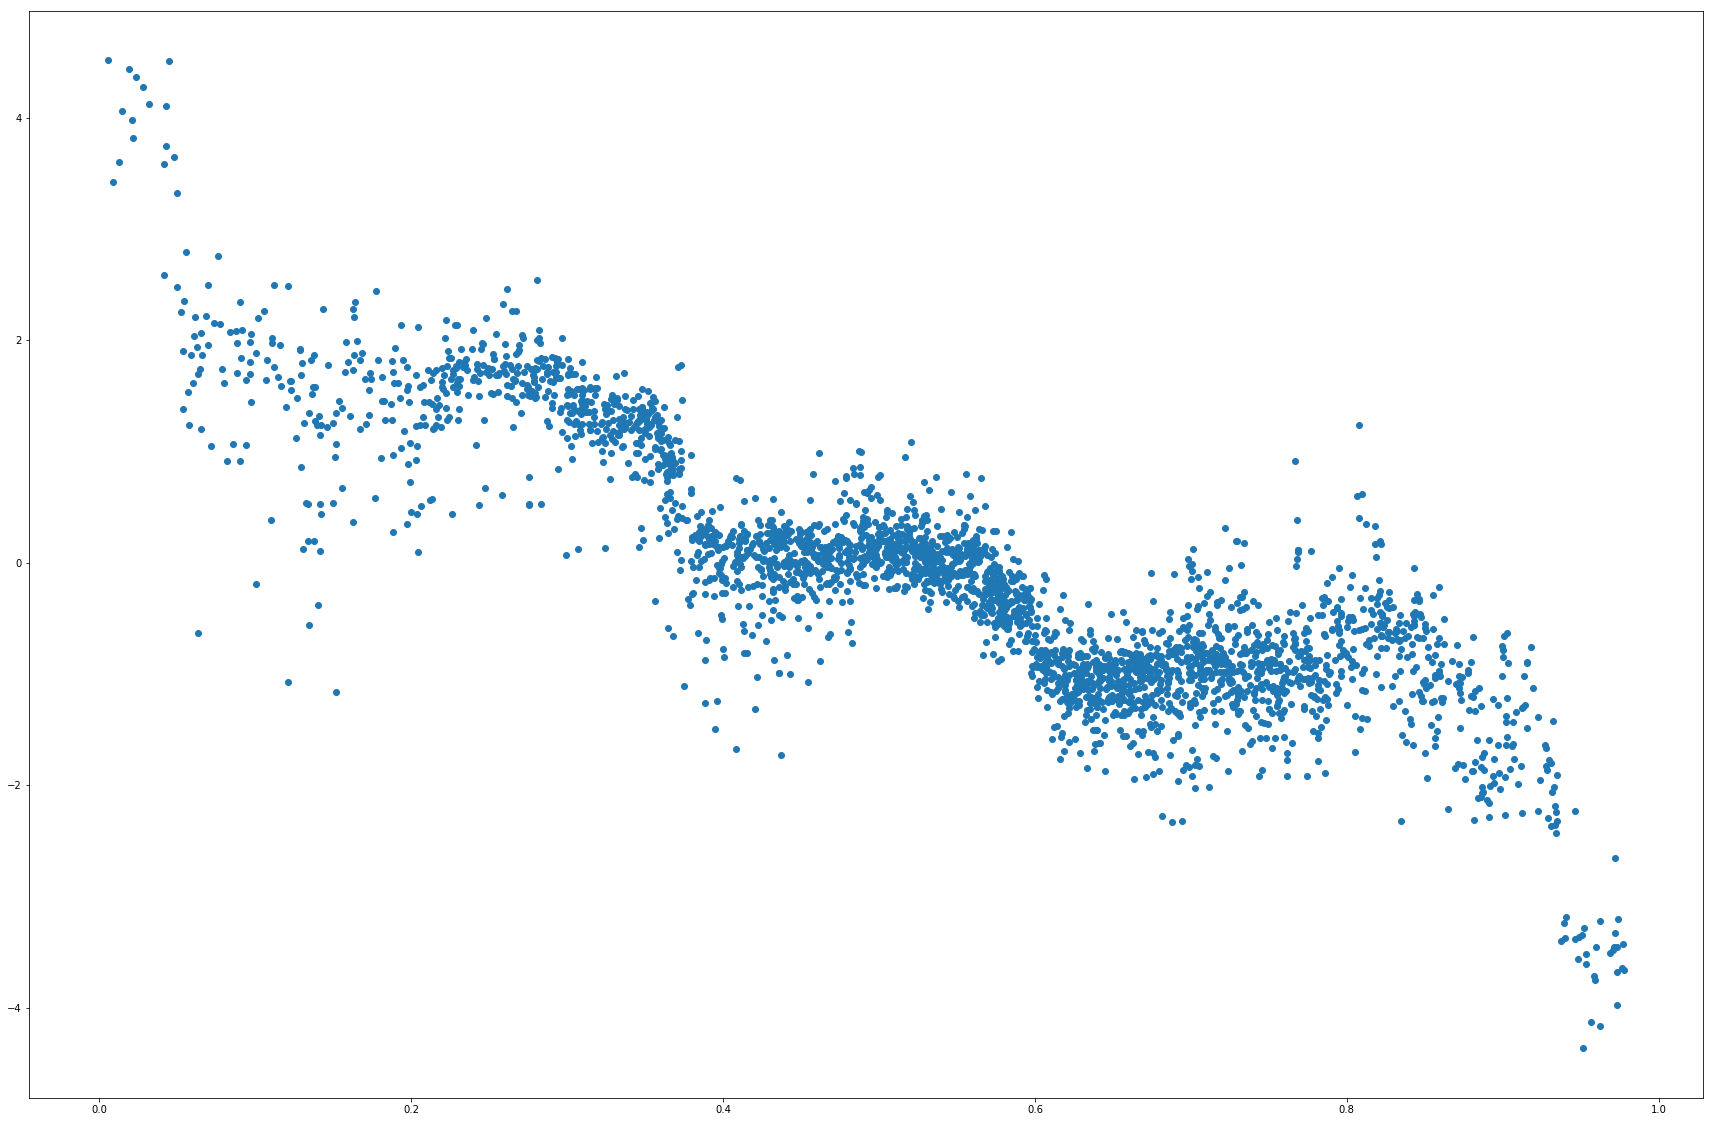

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (30, 20)
plt.scatter(xlist, ylist)
# print(len(xlist), len(ylist))

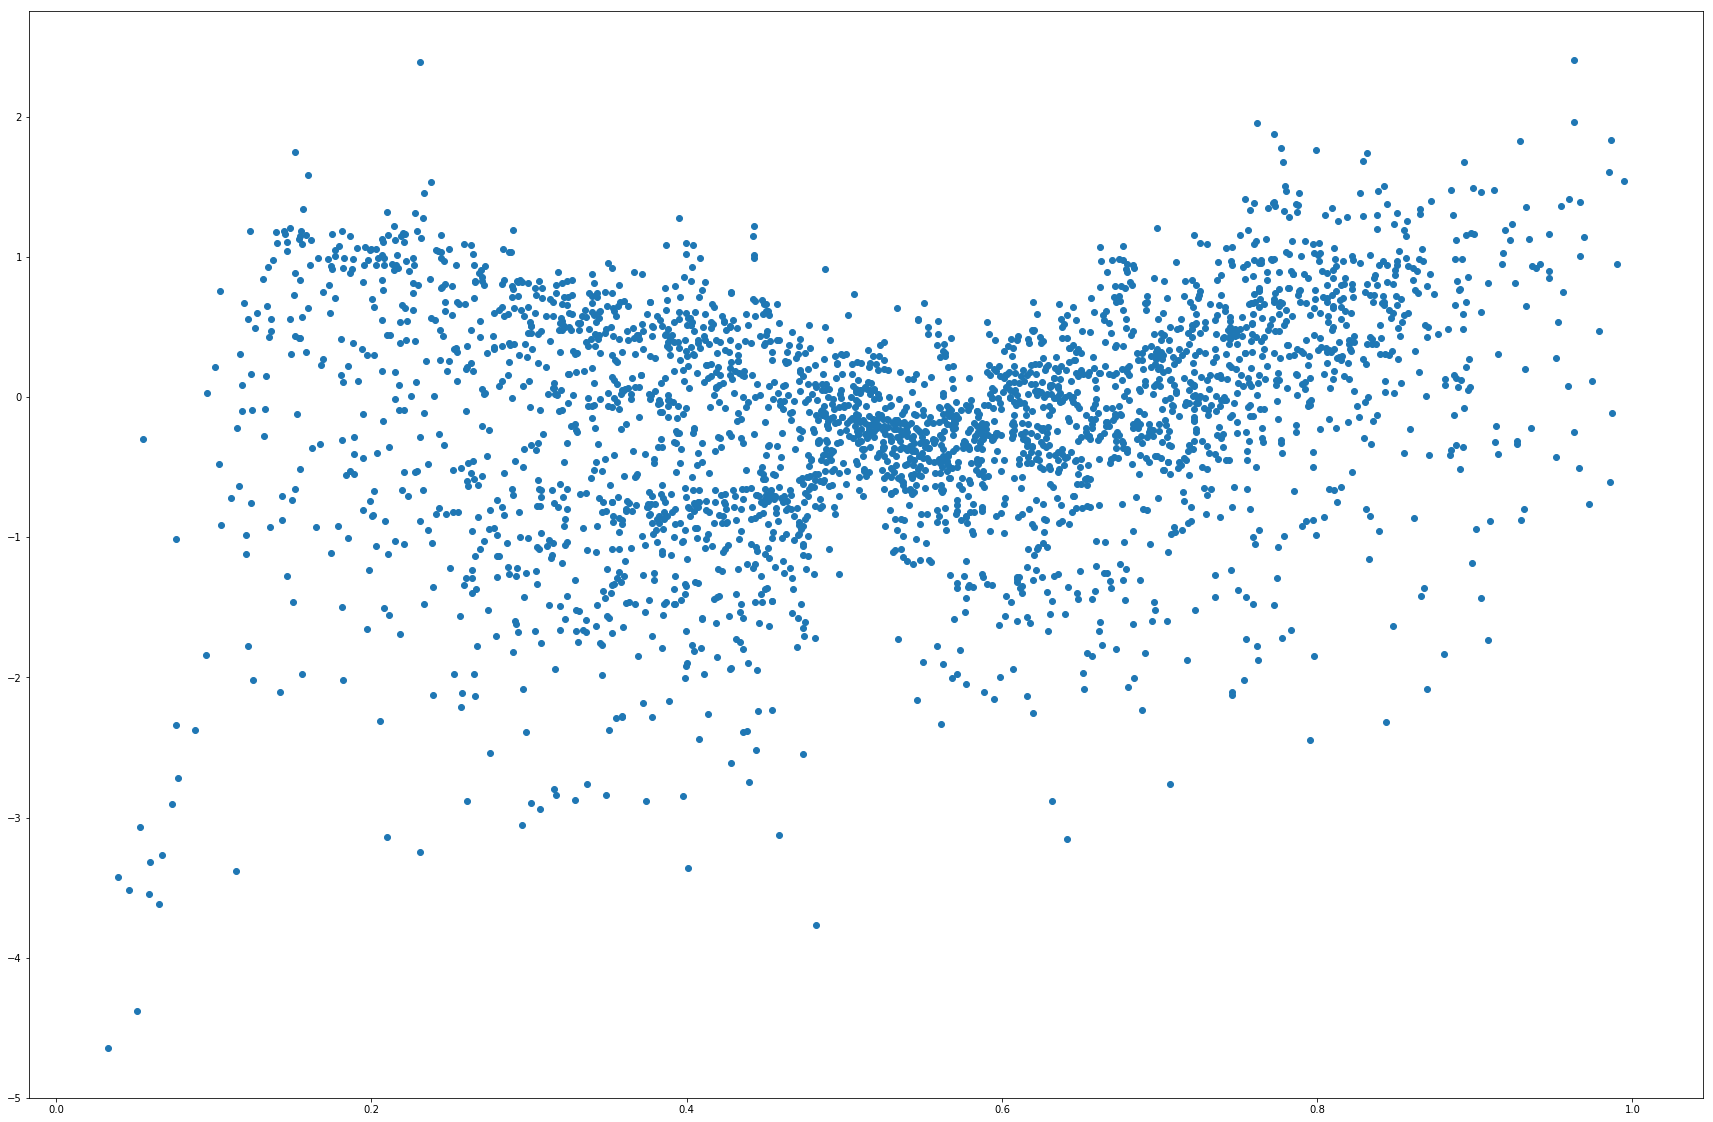

In [19]:
plt.scatter(wlist, zlist)